# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


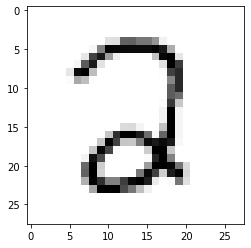

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.2132997560982286
train accuracy is: 0.7897679853113003, test accuracy is 0.813508064516129


Epoch 10 Loss 0.062155428386537794
train accuracy is: 0.9356534802203305, test accuracy is 0.9420362903225806


Epoch 20 Loss 0.04391972340065586
train accuracy is: 0.9516775162744117, test accuracy is 0.9576612903225806


Epoch 30 Loss 0.036744038966116256
train accuracy is: 0.9596895343014522, test accuracy is 0.9637096774193549


Epoch 40 Loss 0.03276050939327718
train accuracy is: 0.9636955433149724, test accuracy is 0.9672379032258065


Epoch 50 Loss 0.03011751675089878
train accuracy is: 0.9661992989484226, test accuracy is 0.9702620967741935


Epoch 60 Loss 0.02818155228847046
train accuracy is: 0.9678684693707228, test accuracy is 0.9712701612903226


Epoch 70 Loss 0.026664205235772533
train accuracy is: 0.9699549323985979, test accuracy is 0.9727822580645161


Epoch 80 Loss 0.025427153383953738
train accuracy is: 0.970956434651978, test accuracy is 0.9732862903225806


Epoch 90 Loss 0.024359478509928204
train accuracy is: 0.9716241028208981, test accuracy is 0.9732862903225806


Epoch 100 Loss 0.023425806688315037
train accuracy is: 0.9732098147220831, test accuracy is 0.9732862903225806


Epoch 110 Loss 0.022595877934018606
train accuracy is: 0.9747120681021533, test accuracy is 0.9753024193548387


Epoch 120 Loss 0.021827600242582
train accuracy is: 0.9759639459188784, test accuracy is 0.9753024193548387


Epoch 130 Loss 0.021126879094796946
train accuracy is: 0.9764646970455684, test accuracy is 0.9778225806451613


Epoch 140 Loss 0.02046778072331897
train accuracy is: 0.9775496578200634, test accuracy is 0.9778225806451613


Epoch 150 Loss 0.019862731779722732
train accuracy is: 0.9783007845100985, test accuracy is 0.9783266129032258


Epoch 160 Loss 0.01926399998048916
train accuracy is: 0.9789684526790186, test accuracy is 0.9773185483870968


Epoch 170 Loss 0.018732299364390522
train accuracy is: 0.9800534134535136, test accuracy is 0.9773185483870968


Epoch 180 Loss 0.01821039626542203
train accuracy is: 0.9805541645802036, test accuracy is 0.9778225806451613


Epoch 190 Loss 0.017721465204002435
train accuracy is: 0.9808879986646637, test accuracy is 0.9773185483870968


Epoch 200 Loss 0.017237470346805752
train accuracy is: 0.9818060423969287, test accuracy is 0.9783266129032258


Epoch 210 Loss 0.016783106279241015
train accuracy is: 0.9826406276080788, test accuracy is 0.9768145161290323


Epoch 220 Loss 0.016358761282489042
train accuracy is: 0.9828910031714237, test accuracy is 0.9773185483870968


Epoch 230 Loss 0.015946455161353446
train accuracy is: 0.9833917542981139, test accuracy is 0.9783266129032258


Epoch 240 Loss 0.015544533924682651
train accuracy is: 0.9838090469036889, test accuracy is 0.9798387096774194


0.002578115638215132

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.2267427835246852
train accuracy is: 0.7408612919379068, test accuracy is 0.7651209677419355


Epoch 10 Loss 0.10278566585414198
train accuracy is: 0.9070272074778835, test accuracy is 0.9193548387096774


Epoch 20 Loss 0.07967782891441628
train accuracy is: 0.9255549991654148, test accuracy is 0.9400201612903226


Epoch 30 Loss 0.06877640956155359
train accuracy is: 0.9343181438824903, test accuracy is 0.9480846774193549


Epoch 40 Loss 0.062146665969669605
train accuracy is: 0.9394091136705057, test accuracy is 0.9516129032258065


Epoch 50 Loss 0.057603084532801864
train accuracy is: 0.942830913036221, test accuracy is 0.9546370967741935


Epoch 60 Loss 0.05425346778406377
train accuracy is: 0.9461692538808212, test accuracy is 0.9571572580645161


Epoch 70 Loss 0.05166037186462897
train accuracy is: 0.9481722583875813, test accuracy is 0.9576612903225806


Epoch 80 Loss 0.04958147191123085
train accuracy is: 0.9496745117676515, test accuracy is 0.9591733870967742


Epoch 90 Loss 0.04786602198496536
train accuracy is: 0.9507594725421465, test accuracy is 0.9596774193548387


Epoch 100 Loss 0.04642106769650054
train accuracy is: 0.9518444333166416, test accuracy is 0.9601814516129032


Epoch 110 Loss 0.04518107230886681
train accuracy is: 0.9530128526122517, test accuracy is 0.9601814516129032


Epoch 120 Loss 0.044102760256807975
train accuracy is: 0.9533466866967117, test accuracy is 0.9611895161290323


Epoch 130 Loss 0.043153045827137394
train accuracy is: 0.9540143548656318, test accuracy is 0.9627016129032258


Epoch 140 Loss 0.04230919997178941
train accuracy is: 0.9550158571190118, test accuracy is 0.9637096774193549


Epoch 150 Loss 0.04155151198966321
train accuracy is: 0.9553496912034719, test accuracy is 0.9647177419354839


Epoch 160 Loss 0.04086628064490374
train accuracy is: 0.956017359372392, test accuracy is 0.9647177419354839


Epoch 170 Loss 0.04024321125681259
train accuracy is: 0.956434651977967, test accuracy is 0.9647177419354839


Epoch 180 Loss 0.03967246957209467
train accuracy is: 0.956935403104657, test accuracy is 0.9647177419354839


Epoch 190 Loss 0.0391484399458158
train accuracy is: 0.957269237189117, test accuracy is 0.9652217741935484


Epoch 200 Loss 0.03866310814936921
train accuracy is: 0.958020363879152, test accuracy is 0.9652217741935484


Epoch 210 Loss 0.03821246156121953
train accuracy is: 0.9581872809213821, test accuracy is 0.9662298387096774


Epoch 220 Loss 0.03779321662586052
train accuracy is: 0.9591053246536472, test accuracy is 0.9657258064516129


Epoch 230 Loss 0.037401292990870104
train accuracy is: 0.9595226172592222, test accuracy is 0.9657258064516129


Epoch 240 Loss 0.03703387479162146
train accuracy is: 0.9600233683859122, test accuracy is 0.9657258064516129


0.06694599076868792

### Comparing results of NN and LR

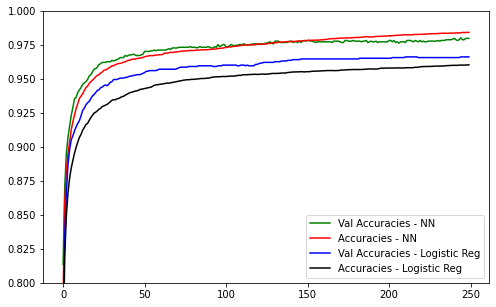

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

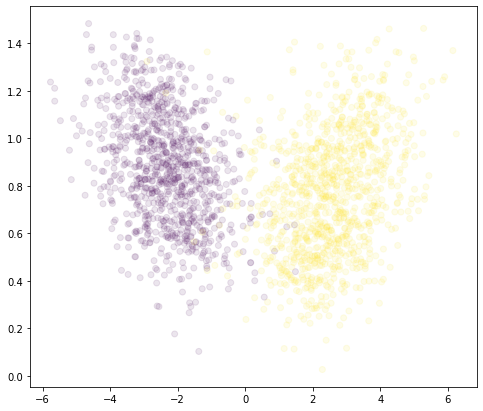

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

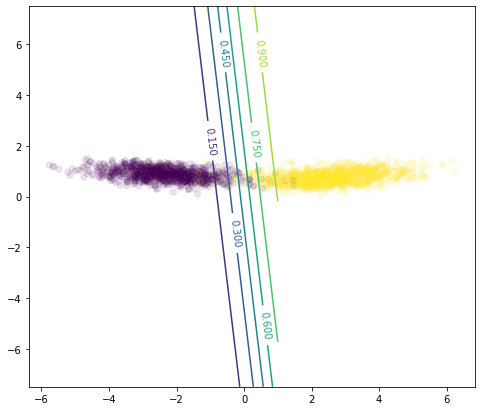

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );